# #Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.base.model import GenericLikelihoodModel

# #Load DataSet

In [2]:
df = pd.read_csv("E:\R Programs\Abalone1.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# #Data Preprocessing

In [3]:
df.count()

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole weight      4177
Shucked weight    4177
Viscera weight    4177
Shell weight      4177
Rings             4177
dtype: int64

In [4]:
df1=df.drop(['Viscera weight','Shell weight','Shucked weight'] ,axis=1)

In [5]:
df1['NewRings'] = np.where(df1['Rings']>10,1,0)

In [6]:
df1=df1.drop(['Rings'] ,axis=1)

In [7]:
df1

,Sex,Length,Diameter,Height,Whole weight,NewRings
0,M,0.455,0.365,0.095,0.5140,1
1,M,0.350,0.265,0.090,0.2255,0
2,F,0.530,0.420,0.135,0.6770,0
3,M,0.440,0.365,0.125,0.5160,0
4,I,0.330,0.255,0.080,0.2050,0
...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,1
4173,M,0.590,0.440,0.135,0.9660,0
4174,M,0.600,0.475,0.205,1.1760,0
4175,F,0.625,0.485,0.150,1.0945,0


In [8]:
df1.isna().sum()

Sex             0
Length          0
Diameter        0
Height          0
Whole weight    0
NewRings        0
dtype: int64

# #Data Visualization

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E43A4AC48>,
      dtype=object)

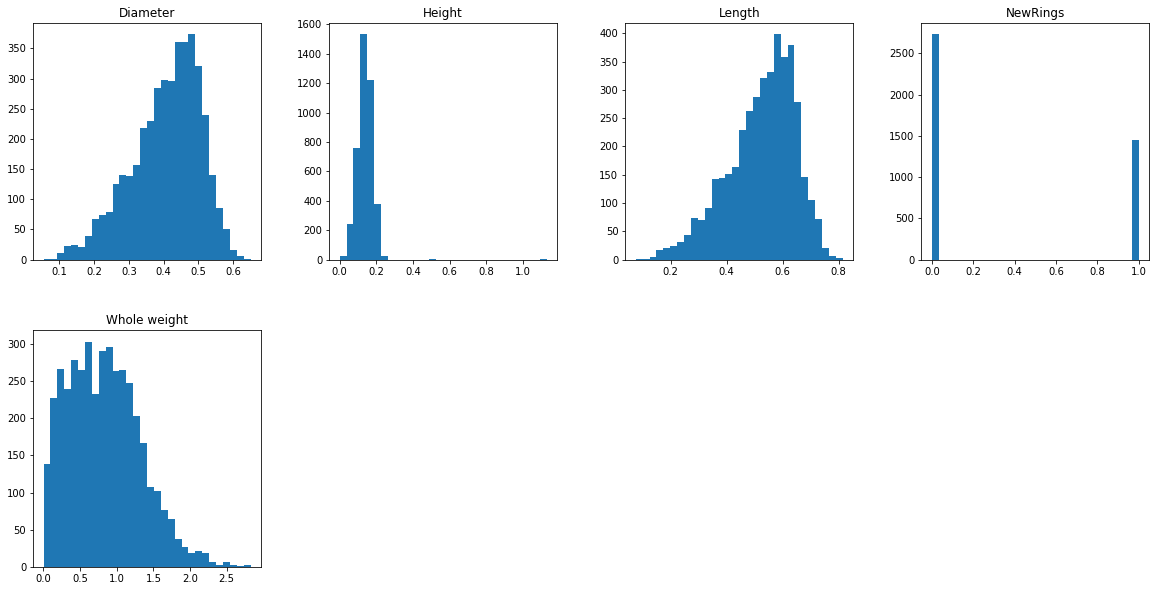

In [9]:
df1.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

### PairPlot

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


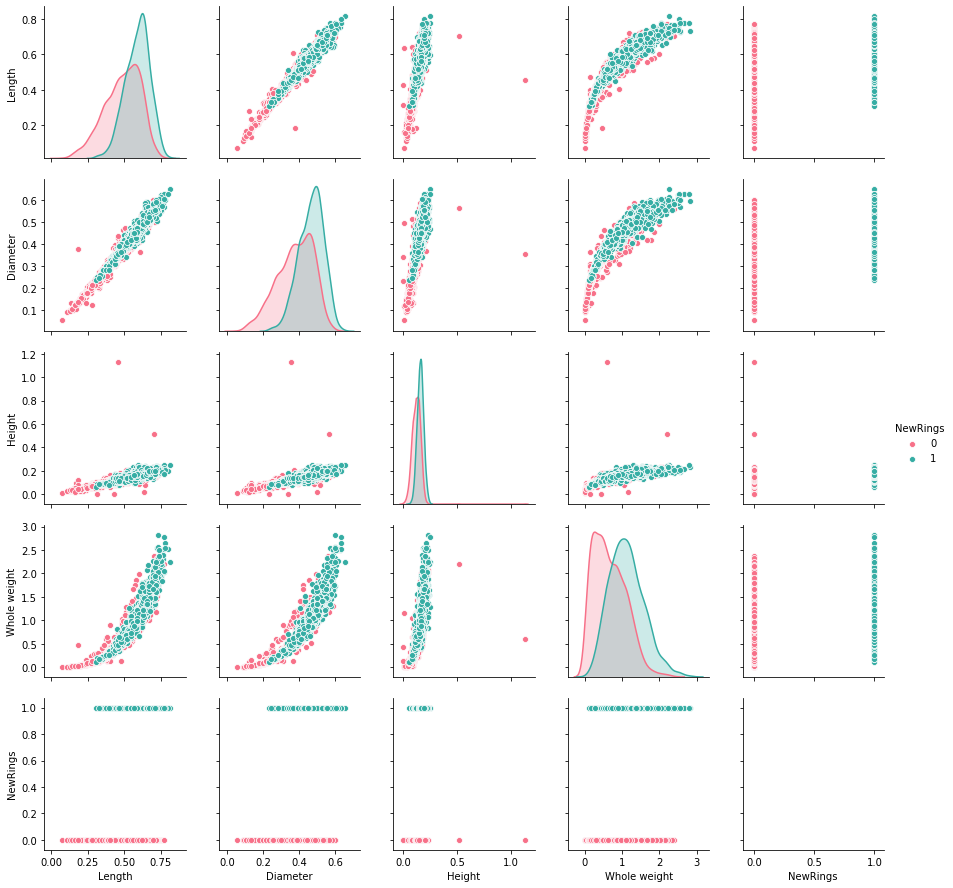

In [10]:
sns.pairplot(df1,hue="NewRings",palette = "husl")

# #Data Seperation Depedent and Inependent Values

In [11]:
x =df1.iloc[:,0:5]

In [12]:
y =df1.iloc[:,-1]

### Encoding Catogorical Data

In [13]:
x['Sex']= np.where(x['Sex']== "M",1,0)

# #Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.33,random_state=45)

# #DesicionTree Classsifier Model Creation

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
Desclassifier = DecisionTreeClassifier(criterion='gini' ,random_state=42)
classifier = Desclassifier.fit(x_train,y_train)

### Prediction

In [17]:
y_pred = Desclassifier.predict(x_test)

### Metrics

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[662, 239],
       [247, 231]], dtype=int64)

### Accuracy

In [19]:
from sklearn.metrics import accuracy_score
accuD =accuracy_score(y_test,y_pred)
accuD

0.6475707034082668

# #Using RandomizedSearch For Optimaization

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
param_grid = { 
    
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,None],
    'criterion' :['gini', 'entropy']
}

### RandomizedSearch Model Creation

In [22]:
DCassifierCV = RandomizedSearchCV(Desclassifier,param_grid,cv=5)
DCassifierCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=42,
                                                    splitter='best'),


### RandomizedSearch Prediction and Accuracy

In [23]:
pred=DCassifierCV.predict(x_test)
CV_DtreeClassifier=accuracy_score(y_test,pred)
CV_DtreeClassifier

0.7157360406091371

# #RandomForest Model Creation

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
Classmodel = RandomForestClassifier(n_estimators = 100, random_state = 42)
Classfit=Classmodel.fit(x_train, y_train)

### Prediction

In [26]:
y_pred = Classmodel.predict(x_test)

### Metrics

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[757, 224],
       [152, 246]], dtype=int64)

### Accuracy

In [28]:
from sklearn.metrics import accuracy_score
Raccu=accuracy_score(y_test,y_pred)
Raccu

0.7273386511965192

# #Using GridSearch For Optimaization

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = { 
    'n_estimators': [400, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

### GridSearch Model Creation

In [31]:
CV_rfc = GridSearchCV(estimator=Classmodel, param_grid=param_grid, cv= 5)

In [32]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'cri

In [33]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 700}

In [34]:
rfc1=RandomForestClassifier(random_state=40, max_features='auto', n_estimators= 400, max_depth=8, criterion='gini')

rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

### GridSearch Prediction and Accuracy

In [35]:
predRF=rfc1.predict(x_test)

CV_RandomForest=accuracy_score(y_test,predRF)
CV_RandomForest

0.7396664249456127

# #XGboost Model Creation

In [36]:
from xgboost import XGBClassifier

In [37]:
XGModel = XGBClassifier(n_estimators=110)
XGModel.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=110, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### XGboost Prediction

In [38]:
y_predXg = XGModel.predict(x_test)
predictions = [round(value) for value in y_predXg]

### Accuracy

In [39]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7396664249456127

# #Using GridSearch For Optimaization

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = { 
    'n_estimators': [10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7],
    'criterion' :['gini', 'entropy']
}

### GridSearch Model Creation

In [42]:
CV_XGb = GridSearchCV(estimator=XGModel, param_grid=param_grid, cv= 10)

In [43]:
CV_XGb.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=110, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                      

In [44]:
CV_XGb.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 10}

In [45]:
XGb1=RandomForestClassifier(random_state=40, max_features='auto', n_estimators= 400, max_depth=8, criterion='gini')

XGb1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

### GridSearch Prediction and Accuracy

In [46]:
predXG=XGb1.predict(x_test)

CV_XGboost=accuracy_score(y_test,predXG)
CV_XGboost

0.7396664249456127

# #SVM Model Creation

In [51]:
from sklearn import svm
from sklearn.svm import SVC

In [52]:
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Prediction

In [53]:
prediction_SVM = classifier.predict(x_test)

### Accuracy

In [54]:
cm = confusion_matrix(y_test, prediction_SVM)
accuSVM =accuracy_score(y_test,prediction_SVM)
accuSVM

0.7092095721537346

# FINAL  RESULTS

In [56]:
Pipeline ={'Model':['DTreeClassifier', 'RFClassifier', 'CV_RFClassifier', 'CV_DtreeClassifier','SVM_Model','XGboostClassifier'],
        'Accuracy':[accuD,Raccu,CV_RandomForest,CV_DtreeClassifier,accuSVM,accuracy]}
Pipeline =pd.DataFrame(Pipeline)

In [57]:
Pipeline

,Model,Accuracy
0,DTreeClassifier,0.647571
1,RFClassifier,0.727339
2,CV_RFClassifier,0.739666
3,CV_DtreeClassifier,0.715736
4,SVM_Model,0.709210
5,XGboostClassifier,0.739666
